In [23]:
import sys
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT_PATH = "../../.././"
MODEL_PATH = os.path.join(ROOT_PATH, "data/training/training_results")
DATA_PATH = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")

def print_measures(y_pred : np.ndarray, y_true : np.ndarray, data_class : str = ""):
    assert type(y_pred) == np.ndarray, f"y_pred is of type {type(y_pred)} instead of 'np.ndarray'"
    assert type(y_true) == np.ndarray, f"y_true is of type {type(y_true)} instead of 'np.ndarray'!"

    if data_class:
        print(f"Printing {data_class} Measures")

    true_labels = list(np.unique(y_train_true))
    print(20*"-")
    print(f"Global measures")
    print(f"Number of entries: {len(y_pred)}")
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    print(f"Accuracy: {acc:.5f}")
    print("===" + 14*' ' + "===")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("===" + 14*' ' + "===")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) and (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Number of entries: {sum(y_true_filtered)}")
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            print(f"Precision score: {prec:.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
    return


def print_confusion_matrix(y_pred : np.ndarray, y_true : np.ndarray, data_class : str = ""):
    assert type(y_pred) == np.ndarray, f"y_pred is of type {type(y_pred)} instead of 'np.ndarray'"
    assert type(y_true) == np.ndarray, f"y_true is of type {type(y_true)} instead of 'np.ndarray'!"

    conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, normalize="true")

    fig, ax = plt.subplots()
    if data_class:
        ax.set_title(f"Confusion Matrix for {data_class} Data")
    else:
        ax.set_title("Confusion Matrix")
    ms = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3, vmin=0, vmax=1)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x = j, y = i, s=f"{conf_matrix[i,j]:.2f}", va='center', ha='center', size='xx-large')

    minor_ticks = np.arange(-0.5,3.5,1)
    ax.set_xticks(minor_ticks, minor = True)
    ax.set_yticks(minor_ticks, minor = True)
    ax.grid(True, which="minor",axis="both", linewidth=0.25)
    ax.set_xlabel('Predictions')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('Actuals')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(ms, cax=cax)

    plt.show()
    return

def create_folder_strings(model_folder_end, data_folder_end):
    return os.path.join(MODEL_PATH, model_folder_end), os.path.join(DATA_PATH, data_folder_end)

def check_format(y):
    if isinstance(y, pd.DataFrame):
        logging.warning(f"Array y is type '{type(y)}'. Expected 'np.ndarray' and was changed to it.")
        y = y.to_numpy()
    y = y.ravel()
    return y

def get_target_data(true_target_folder : str, pred_target_folder: str, y_train_true_name = "y_train.pkl", y_test_true_name = "y_test.pkl", y_train_pred_name = "y_train_pred.pkl", y_test_pred_name = "y_test_pred.pkl"):
    
    if not os.path.exists(os.path.join(true_target_folder, y_train_true_name)):
        y_train_true_name = "y_train_df.pkl"
    if not os.path.exists(os.path.join(true_target_folder, y_test_true_name)):
        y_test_true_name = "y_test_df.pkl"
    
    _y_train_true = np.load(os.path.join(true_target_folder, y_train_true_name), allow_pickle=True)
    _y_train_true = check_format(_y_train_true)
    _y_test_true = np.load(os.path.join(true_target_folder, y_test_true_name), allow_pickle=True)
    _y_test_true = check_format(_y_test_true)
    _y_train_pred = np.load(os.path.join(pred_target_folder, y_train_pred_name), allow_pickle=True)
    _y_train_pred = check_format(_y_train_pred)
    _y_test_pred = np.load(os.path.join(pred_target_folder, y_test_pred_name), allow_pickle=True)
    _y_test_pred = check_format(_y_test_pred)
    return (_y_train_pred, _y_train_true), (_y_test_pred, _y_test_true)

def print_eval(model_folder_end, data_folder_end):
    model_path, data_path = create_folder_strings(model_folder_end=model_folder_end, data_folder_end=data_folder_end)
    y_train_tuple, y_test_tuple = get_target_data(true_target_folder=data_path, pred_target_folder=model_path) 
    print_measures(y_pred=y_train_tuple[0], y_true=y_train_tuple[1], data_class="Train")
    print_confusion_matrix(y_pred=y_train_tuple[0], y_true=y_train_tuple[1], data_class="Train")
    print_measures(y_pred=y_test_tuple[0], y_true=y_test_tuple[1], data_class="Test")
    print_confusion_matrix(y_pred=y_test_tuple[0], y_true=y_test_tuple[1], data_class="Test")


# Baseline Evaluation

## Evenly-Distributed Baseline

In [24]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_even.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_even.pkl").to_numpy()

#### Train

Printing Training Measures
--------------------
Global measures
Number of entries: 279097
Accuracy: 0.33238
===              ===
Precision-µ: 0.33238
Recall-µ: 0.33238
F1-Score-µ: 0.33238
===              ===
Precision-M: 0.33228
Recall-M: 0.33240
F1-Score-M: 0.30804
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.29579
Recall score: 0.33062
--------------------
Measures for label '1'
Number of entries: 158261
Precision score: 0.56559
Recall score: 0.33301
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.13547
Recall score: 0.33357


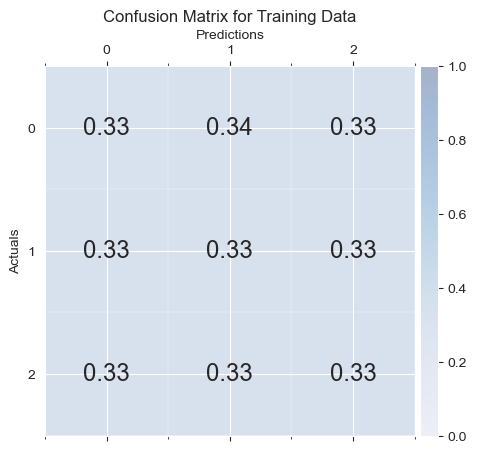

In [25]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Training")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Training")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.33383
===              ===
Precision-µ: 0.33383
Recall-µ: 0.33383
F1-Score-µ: 0.33383
===              ===
Precision-M: 0.33349
Recall-M: 0.33293
F1-Score-M: 0.30912
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.29786
Recall score: 0.33664
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.56804
Recall score: 0.33362
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.13458
Recall score: 0.32854


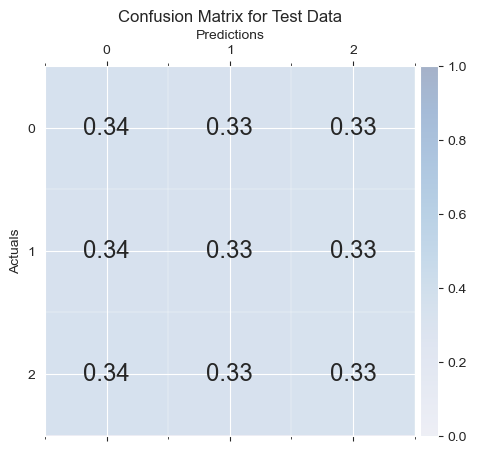

In [26]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Training-Distributed Baseline

In [27]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_dist.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_dist.pkl").to_numpy()

#### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 279097
Accuracy: 0.42979
===              ===
Precision-µ: 0.42979
Recall-µ: 0.42979
F1-Score-µ: 0.42979
===              ===
Precision-M: 0.33463
Recall-M: 0.33463
F1-Score-M: 0.33463
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.29839
Recall score: 0.29812
--------------------
Measures for label '1'
Number of entries: 158261
Precision score: 0.56809
Recall score: 0.56885
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.13742
Recall score: 0.13692


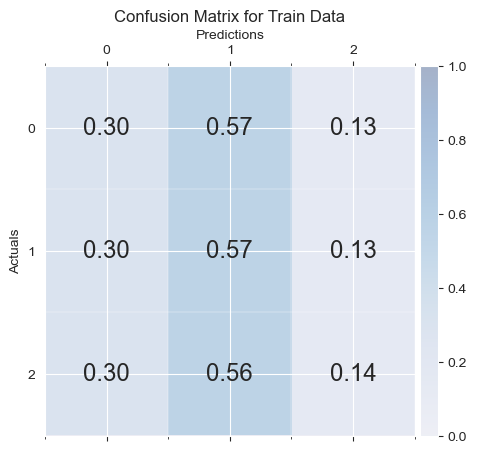

In [28]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.43025
===              ===
Precision-µ: 0.43025
Recall-µ: 0.43025
F1-Score-µ: 0.43025
===              ===
Precision-M: 0.33459
Recall-M: 0.33458
F1-Score-M: 0.33458
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.29953
Recall score: 0.29684
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.57004
Recall score: 0.57044
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.13421
Recall score: 0.13645


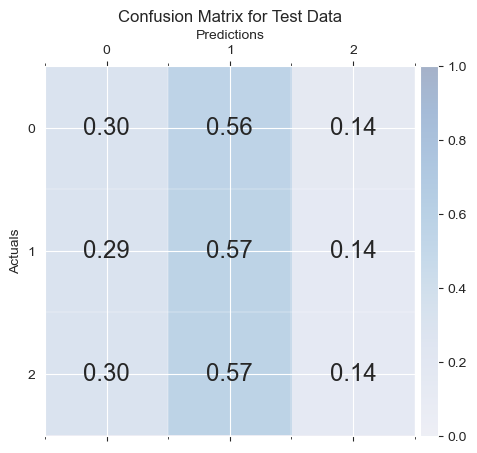

In [29]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Majority-Guessing Baseline

In [30]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_maj.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_maj.pkl").to_numpy()

#### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 279097
Accuracy: 0.56705
===              ===
Precision-µ: 0.56705
Recall-µ: 0.56705
F1-Score-µ: 0.56705
===              ===
Precision-M: 0.18902
Recall-M: 0.33333
F1-Score-M: 0.24124


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------
Measures for label '1'
Number of entries: 158261
Precision score: 0.56705
Recall score: 1.00000


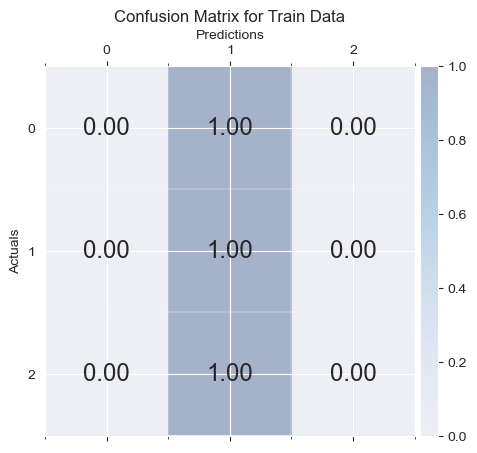

In [31]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.56705
===              ===
Precision-µ: 0.56705
Recall-µ: 0.56705
F1-Score-µ: 0.56705
===              ===
Precision-M: 0.18902
Recall-M: 0.33333
F1-Score-M: 0.24124


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.56705
Recall score: 1.00000


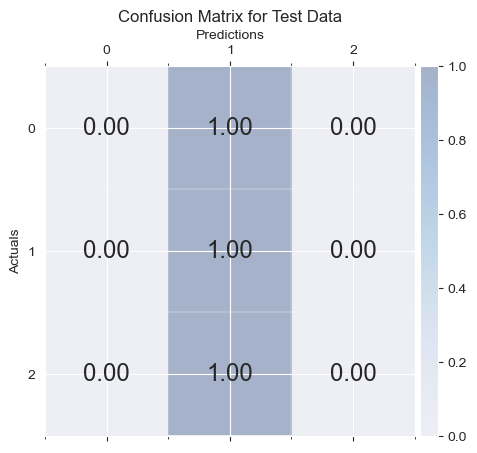

In [32]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Delay Baseline

In [33]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true_B.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_delay.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true_B.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_delay.pkl").to_numpy()

### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.64218
===              ===
Precision-µ: 0.64218
Recall-µ: 0.64218
F1-Score-µ: 0.64218
===              ===
Precision-M: 0.72639
Recall-M: 0.57776
F1-Score-M: 0.51245
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.79698
Recall score: 0.00828
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.62279
Recall score: 0.94137
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 0.75939
Recall score: 0.78362


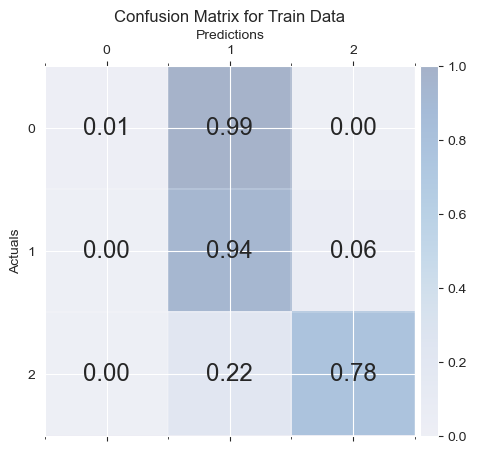

In [34]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.64172
===              ===
Precision-µ: 0.64172
Recall-µ: 0.64172
F1-Score-µ: 0.64172
===              ===
Precision-M: 0.75080
Recall-M: 0.57562
F1-Score-M: 0.51118
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.87047
Recall score: 0.00810
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.62226
Recall score: 0.94237
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.75967
Recall score: 0.77639


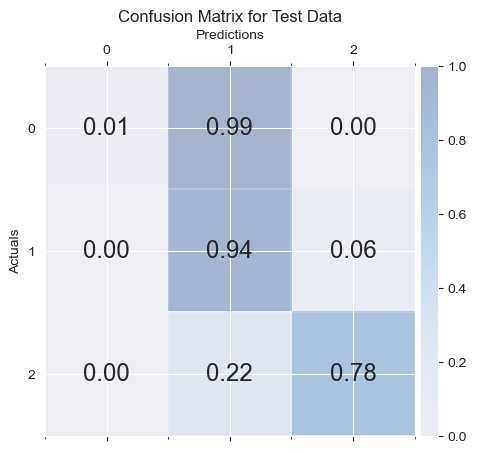

In [35]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

# RandomForest Evaluation

## Version from 2023_02_06-1122

Printing Train Measures
--------------------
Global measures
Number of entries: 245619
Accuracy: 0.77844
===              ===
Precision-µ: 0.77844
Recall-µ: 0.77844
F1-Score-µ: 0.77844
===              ===
Precision-M: 0.77505
Recall-M: 0.71916
F1-Score-M: 0.73936
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.77447
Recall score: 0.75490
--------------------
Measures for label '1'
Number of entries: 124783
Precision score: 0.78276
Recall score: 0.86801
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.76794
Recall score: 0.53456


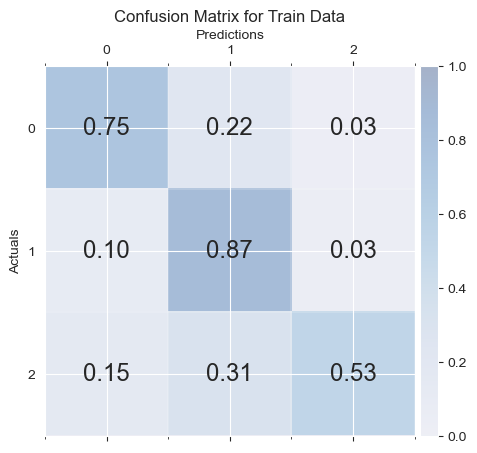

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.58173
===              ===
Precision-µ: 0.58173
Recall-µ: 0.58173
F1-Score-µ: 0.58173
===              ===
Precision-M: 0.53774
Recall-M: 0.51776
F1-Score-M: 0.52458
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.47377
Recall score: 0.53312
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.66577
Recall score: 0.66021
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.47369
Recall score: 0.35995


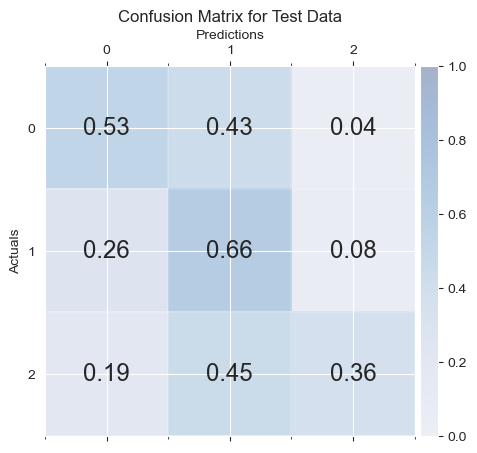

In [36]:
print_eval(model_folder_end="RF/2023_02_06-1122", data_folder_end="NEW")

## Version from 2023_06_21-2317

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.81402
===              ===
Precision-µ: 0.81402
Recall-µ: 0.81402
F1-Score-µ: 0.81402
===              ===
Precision-M: 0.83547
Recall-M: 0.79349
F1-Score-M: 0.81202
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.74807
Recall score: 0.73993
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.82419
Recall score: 0.86099
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 0.93414
Recall score: 0.77956


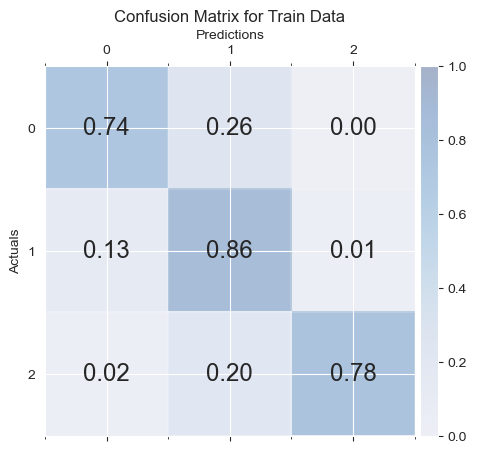

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.72518
===              ===
Precision-µ: 0.72518
Recall-µ: 0.72518
F1-Score-µ: 0.72518
===              ===
Precision-M: 0.75234
Recall-M: 0.70611
F1-Score-M: 0.72622
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.61935
Recall score: 0.59589
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.74509
Recall score: 0.79168
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.89256
Recall score: 0.73075


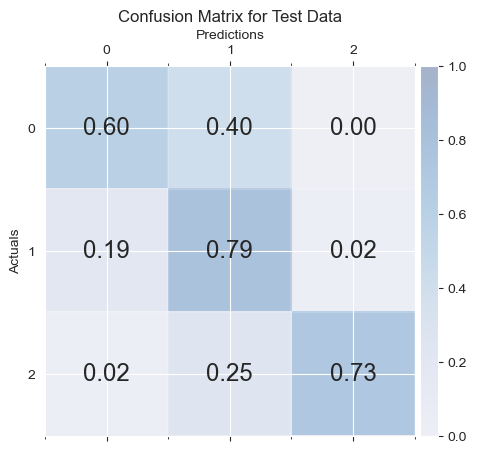

In [37]:
print_eval(model_folder_end="RF/2023_06_21-2317", data_folder_end="B")

## Version from 2024_01_25-1817

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.99979
===              ===
Precision-µ: 0.99979
Recall-µ: 0.99979
F1-Score-µ: 0.99979
===              ===
Precision-M: 0.99975
Recall-M: 0.99986
F1-Score-M: 0.99981
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.99943
Recall score: 0.99992
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.99997
Recall score: 0.99968
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 0.99984
Recall score: 1.00000


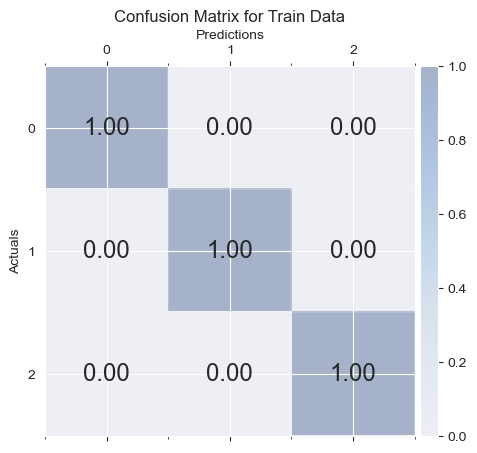

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.72260
===              ===
Precision-µ: 0.72260
Recall-µ: 0.72260
F1-Score-µ: 0.72260
===              ===
Precision-M: 0.75393
Recall-M: 0.68869
F1-Score-M: 0.71453
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.63928
Recall score: 0.51556
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.72454
Recall score: 0.83220
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.89796
Recall score: 0.71829


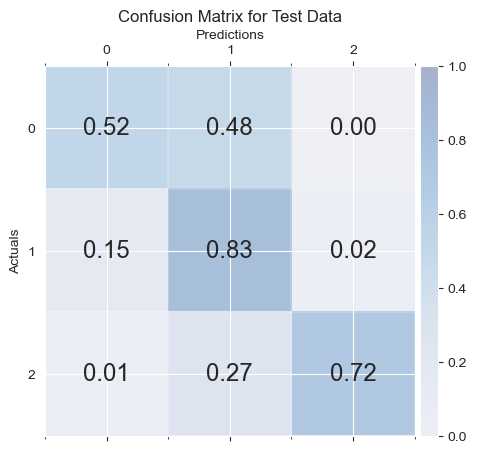

In [38]:
print_eval(model_folder_end="RF/2024_01_25-1817", data_folder_end="B")

## Version from 2024_02_10-1212

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.90409
===              ===
Precision-µ: 0.90409
Recall-µ: 0.90409
F1-Score-µ: 0.90409
===              ===
Precision-M: 0.91310
Recall-M: 0.92512
F1-Score-M: 0.91629
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.79278
Recall score: 0.93944
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.95917
Recall score: 0.87130
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 0.98736
Recall score: 0.96461


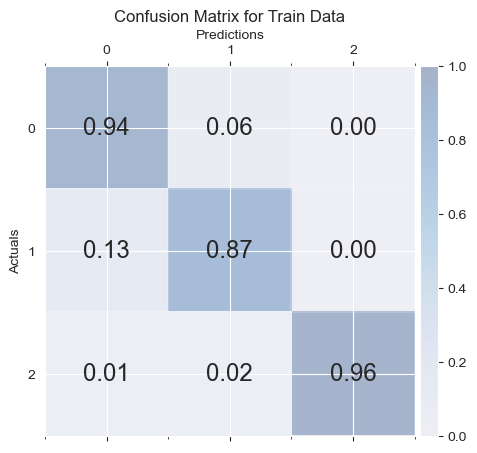

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.71754
===              ===
Precision-µ: 0.71754
Recall-µ: 0.71754
F1-Score-µ: 0.71754
===              ===
Precision-M: 0.74403
Recall-M: 0.71903
F1-Score-M: 0.72820
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.58659
Recall score: 0.68634
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.76894
Recall score: 0.72797
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.87655
Recall score: 0.74278


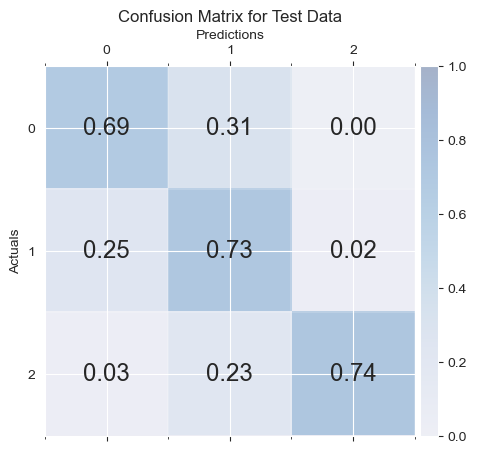

In [39]:
print_eval(model_folder_end="RF/2024_02_10-1212", data_folder_end="B")

## Version from 2024_06_02-0115

Printing Train Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.69660
===              ===
Precision-µ: 0.69660
Recall-µ: 0.69660
F1-Score-µ: 0.69660
===              ===
Precision-M: 0.72100
Recall-M: 0.73754
F1-Score-M: 0.71634
--------------------
Measures for label '0'
Number of entries: 71145
Precision score: 0.50931
Recall score: 0.77128
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.82607
Recall score: 0.64011
--------------------
Measures for label '2'
Number of entries: 34368
Precision score: 0.82761
Recall score: 0.80124


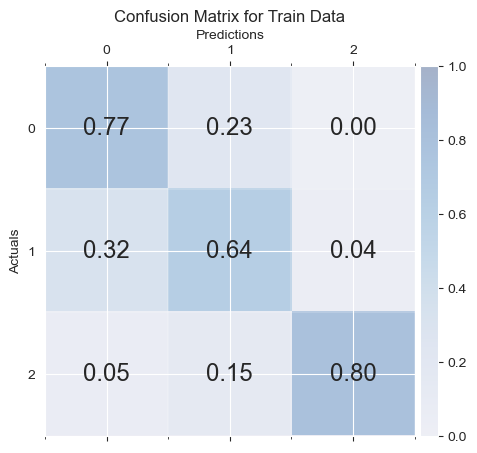

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.68165
===              ===
Precision-µ: 0.68165
Recall-µ: 0.68165
F1-Score-µ: 0.68165
===              ===
Precision-M: 0.70477
Recall-M: 0.71552
F1-Score-M: 0.69827
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.49976
Recall score: 0.74830
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.80498
Recall score: 0.63325
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.80958
Recall score: 0.76501


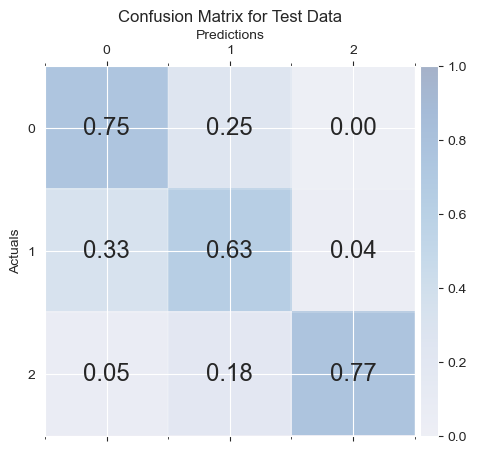

In [40]:
print_eval(model_folder_end="RF/2024_06_02-0115", data_folder_end="CCLASS")

## Version from 2024_06_17-0522

Printing Train Measures
--------------------
Global measures
Number of entries: 250808
Accuracy: 0.88599
===              ===
Precision-µ: 0.88599
Recall-µ: 0.88599
F1-Score-µ: 0.88599
===              ===
Precision-M: 0.87474
Recall-M: 0.91548
F1-Score-M: 0.89094
--------------------
Measures for label '0'
Number of entries: 71185
Precision score: 0.76091
Recall score: 0.93104
--------------------
Measures for label '1'
Number of entries: 157646
Precision score: 0.96090
Recall score: 0.85532
--------------------
Measures for label '2'
Number of entries: 21977
Precision score: 0.90240
Recall score: 0.96009


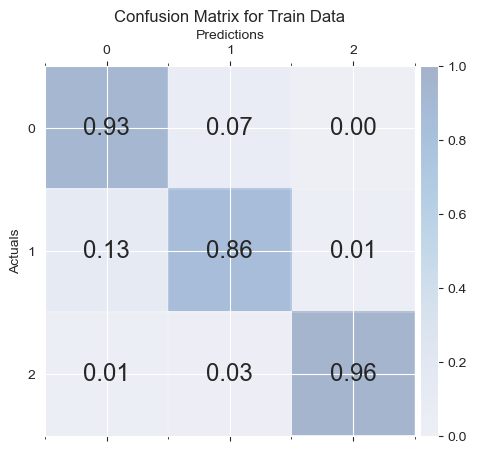

Printing Test Measures
--------------------
Global measures
Number of entries: 62703
Accuracy: 0.70979
===              ===
Precision-µ: 0.70979
Recall-µ: 0.70979
F1-Score-µ: 0.70979
===              ===
Precision-M: 0.69206
Recall-M: 0.68767
F1-Score-M: 0.68739
--------------------
Measures for label '0'
Number of entries: 17796
Precision score: 0.56255
Recall score: 0.67167
--------------------
Measures for label '1'
Number of entries: 39412
Precision score: 0.79435
Recall score: 0.73437
--------------------
Measures for label '2'
Number of entries: 5495
Precision score: 0.71927
Recall score: 0.65696


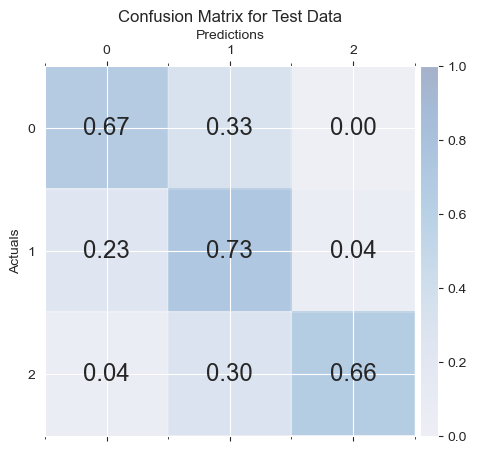

In [41]:
print_eval(model_folder_end="RF/2024_06_17-0522", data_folder_end="DCLASS")

## Version from 2024_06_17-0642

Printing Train Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.93259
===              ===
Precision-µ: 0.93259
Recall-µ: 0.93259
F1-Score-µ: 0.93259
===              ===
Precision-M: 0.93235
Recall-M: 0.94977
F1-Score-M: 0.93905
--------------------
Measures for label '0'
Number of entries: 71145
Precision score: 0.82890
Recall score: 0.95991
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.97730
Recall score: 0.91008
--------------------
Measures for label '2'
Number of entries: 34368
Precision score: 0.99084
Recall score: 0.97931


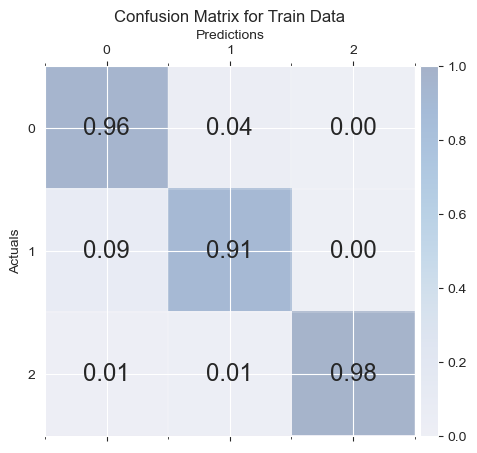

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.73429
===              ===
Precision-µ: 0.73429
Recall-µ: 0.73429
F1-Score-µ: 0.73429
===              ===
Precision-M: 0.75099
Recall-M: 0.71565
F1-Score-M: 0.73029
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.58298
Recall score: 0.63955
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.78223
Recall score: 0.77836
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.88776
Recall score: 0.72905


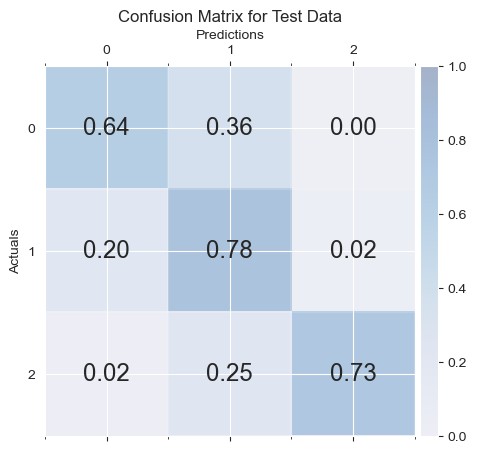

In [42]:
print_eval(model_folder_end="RF/2024_06_17-0642", data_folder_end="CCLASS")

# Support Vector Classifier Evaluation

## Version from 2023_02_23-1711

Printing Train Measures
--------------------
Global measures
Number of entries: 245619
Accuracy: 0.60775
===              ===
Precision-µ: 0.60775
Recall-µ: 0.60775
F1-Score-µ: 0.60775
===              ===
Precision-M: 0.58305
Recall-M: 0.56037
F1-Score-M: 0.56947
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.56426
Recall score: 0.56456
--------------------
Measures for label '1'
Number of entries: 124783
Precision score: 0.65209
Recall score: 0.69202
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.53280
Recall score: 0.42453


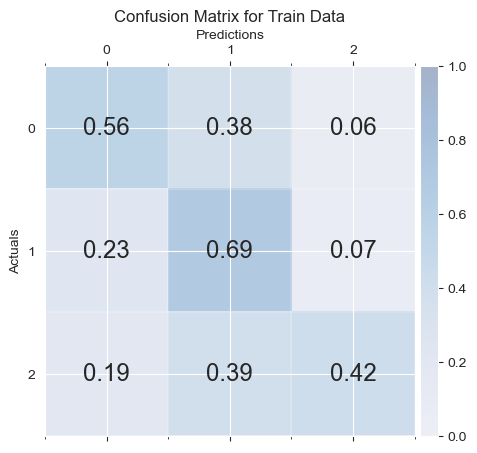

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.57231
===              ===
Precision-µ: 0.57231
Recall-µ: 0.57231
F1-Score-µ: 0.57231
===              ===
Precision-M: 0.52471
Recall-M: 0.52160
F1-Score-M: 0.52171
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.46826
Recall score: 0.54093
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.67047
Recall score: 0.63186
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.43539
Recall score: 0.39200


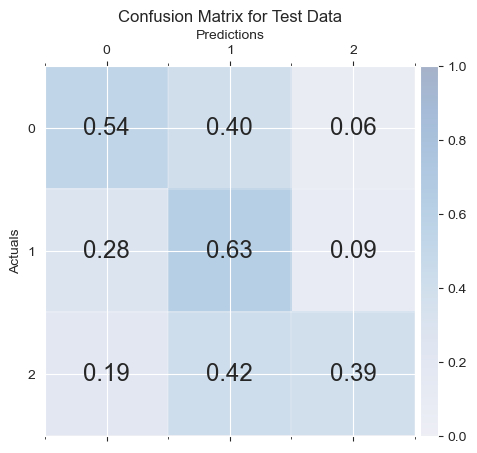

In [43]:
print_eval(model_folder_end="SVC/2023_02_23-1711", data_folder_end="NEW")

# Naive Bayes Classifier
## Version from 2023_02_22-0901

Printing Train Measures
--------------------
Global measures
Number of entries: 245619
Accuracy: 0.38311
===              ===
Precision-µ: 0.38311
Recall-µ: 0.38311
F1-Score-µ: 0.38311
===              ===
Precision-M: 0.43209
Recall-M: 0.41449
F1-Score-M: 0.33501
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.36785
Recall score: 0.83693
--------------------
Measures for label '1'
Number of entries: 124783
Precision score: 0.60084
Recall score: 0.10631
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.32757
Recall score: 0.30023


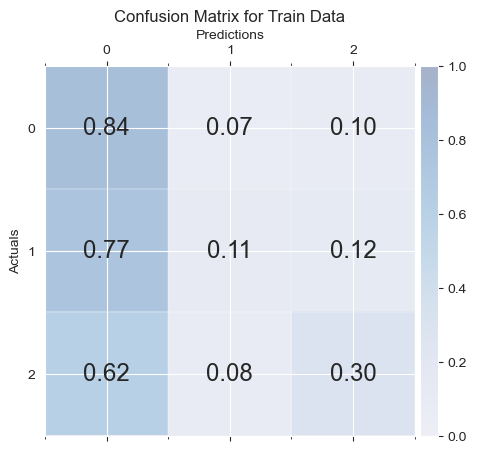

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.34906
===              ===
Precision-µ: 0.34906
Recall-µ: 0.34906
F1-Score-µ: 0.34906
===              ===
Precision-M: 0.42206
Recall-M: 0.41734
F1-Score-M: 0.31576
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.32458
Recall score: 0.83777
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.64563
Recall score: 0.10135
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.29598
Recall score: 0.31288


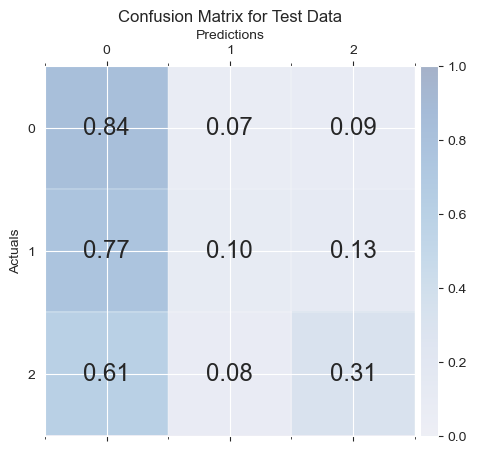

In [44]:
print_eval(model_folder_end="NB/2023_02_22-0901", data_folder_end="NEW")

# Multi-Layer Perceptron Classifier
## Version from 2023_02_22-0527

Printing Train Measures
--------------------
Global measures
Number of entries: 245619
Accuracy: 0.60233
===              ===
Precision-µ: 0.60233
Recall-µ: 0.60233
F1-Score-µ: 0.60233
===              ===
Precision-M: 0.58625
Recall-M: 0.55688
F1-Score-M: 0.56656
--------------------
Measures for label '0'
Number of entries: 83018
Precision score: 0.54766
Recall score: 0.61542
--------------------
Measures for label '1'
Number of entries: 124783
Precision score: 0.65252
Recall score: 0.65481
--------------------
Measures for label '2'
Number of entries: 37818
Precision score: 0.55858
Recall score: 0.40042


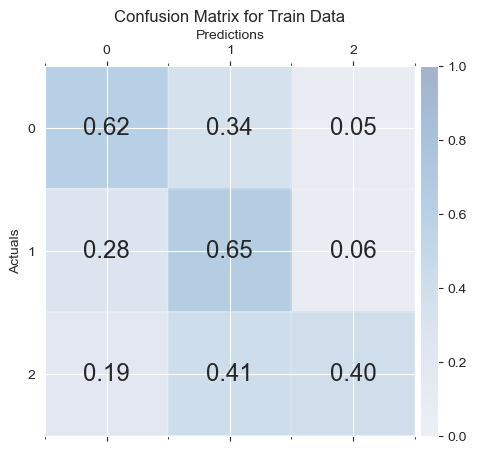

Printing Test Measures
--------------------
Global measures
Number of entries: 69775
Accuracy: 0.55087
===              ===
Precision-µ: 0.55087
Recall-µ: 0.55087
F1-Score-µ: 0.55087
===              ===
Precision-M: 0.50809
Recall-M: 0.50011
F1-Score-M: 0.49939
--------------------
Measures for label '0'
Number of entries: 20755
Precision score: 0.44304
Recall score: 0.56902
--------------------
Measures for label '1'
Number of entries: 39566
Precision score: 0.65949
Recall score: 0.59187
--------------------
Measures for label '2'
Number of entries: 9454
Precision score: 0.42174
Recall score: 0.33943


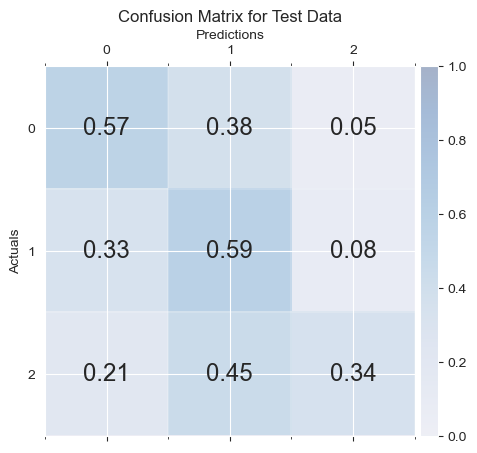

In [45]:
print_eval(model_folder_end="MLP/2023_02_22-0527", data_folder_end="NEW")

# ADABOOST Classifier

## Version from 2024_06_16-0229

Printing Train Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.71640
===              ===
Precision-µ: 0.71640
Recall-µ: 0.71640
F1-Score-µ: 0.71640
===              ===
Precision-M: 0.73587
Recall-M: 0.65600
F1-Score-M: 0.68505
--------------------
Measures for label '0'
Number of entries: 71145
Precision score: 0.59114
Recall score: 0.41716
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.72499
Recall score: 0.85613
--------------------
Measures for label '2'
Number of entries: 34368
Precision score: 0.89146
Recall score: 0.69472


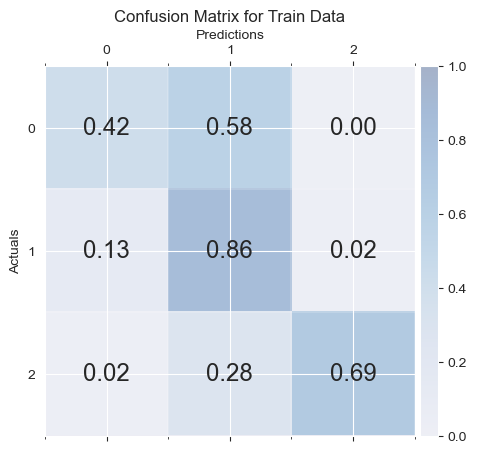

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.71462
===              ===
Precision-µ: 0.71462
Recall-µ: 0.71462
F1-Score-µ: 0.71462
===              ===
Precision-M: 0.73458
Recall-M: 0.65314
F1-Score-M: 0.68259
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.59066
Recall score: 0.41544
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.72300
Recall score: 0.85601
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.89008
Recall score: 0.68797


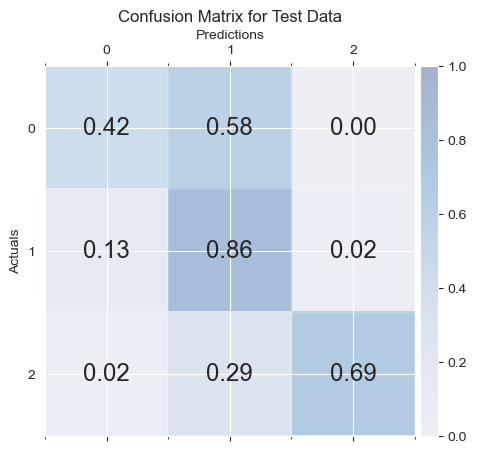

In [46]:
print_eval("ADAB/2024_06_16-0229", "CCLASS")

# K-Nearest-Neighbours Classifier

## Version from 2024_01_26-0007

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.99979
===              ===
Precision-µ: 0.99979
Recall-µ: 0.99979
F1-Score-µ: 0.99979
===              ===
Precision-M: 0.99977
Recall-M: 0.99984
F1-Score-M: 0.99981
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.99935
Recall score: 1.00000
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.99997
Recall score: 0.99967
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 1.00000
Recall score: 0.99984


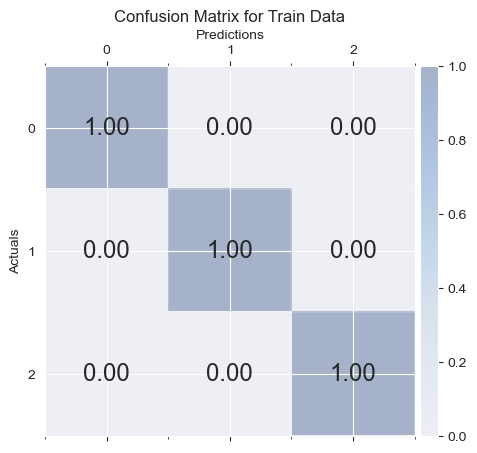

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.63354
===              ===
Precision-µ: 0.63354
Recall-µ: 0.63354
F1-Score-µ: 0.63354
===              ===
Precision-M: 0.68879
Recall-M: 0.51109
F1-Score-M: 0.54565
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.55325
Recall score: 0.33043
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.63560
Recall score: 0.86122
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.87752
Recall score: 0.34164


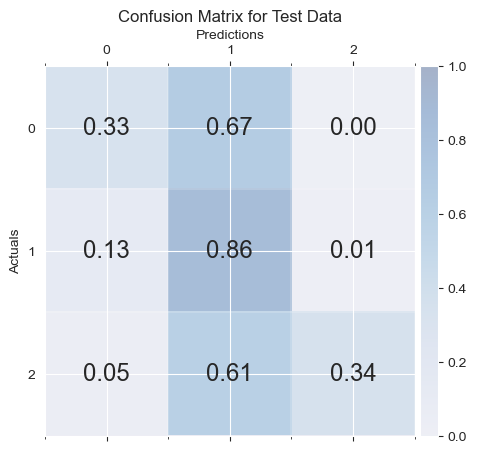

In [47]:
print_eval(model_folder_end="KNN/2024_01_26-0007", data_folder_end="B")